Resolver a Integral a seguir pelo Método da Integração de Monte Carlo e pelo Método da Integração por Importância.

$$ I = \int_{-2}^{2}e^{\ x^2\ +\ x}\ dx$$



Importando as bibliotecas necessárias:

In [18]:
import numpy as np
import matplotlib.pyplot as plt

Inicialização da quantidade de amostras:

In [19]:
N = 10000000
u = np.random.uniform(0, 1, N)

Para o Método de Monte Carlo, o intervalo da Integral deve ser padronizado para $(0,\ 1)$ por uma variável auxiliar

$$u=\frac{x-a}{b-a}\ \therefore\ du=\frac{dx}{b-a},$$ tal que $$ I = \int_{a}^{b} g(x)\ dx = \int_{0}^{1}g((b-a)u+a)(b-a)\ du.$$ $$$$

Dessa forma, $$u=\frac{x-(-2)}{2-(-2)}=\frac{x+2}{2+2},$$

portanto: $$x=4u-2\ \rightarrow\ dx = 4du$$ $$$$ $$I = \int_{-2}^{2}e^{\ x^2\ +\ x}\ dx = 4\cdot\int_{0}^{1}e^{\ (4u-2)^2\ +\ (4u-2)}\ du$$

In [20]:
u = np.random.uniform(0, 1, N)
integral = 4*np.sum(np.exp(pow(4*u-2, 2) + (4*u-2)))/N
print(f'O resultado da integral pelo Método de Monte Carlo é {integral:.4f}.')

O resultado da integral pelo Método de Monte Carlo é 93.2629.


Pelo Método da Integração por Importância, é definida uma função $g(x)$ tal que

$$\int_{a}^{b}\ g(x)\ dx = 1$$ $$$$

Foi escolhida a função $g(x) = A\cdot e^{x}$ no intervalo $(-2,\ 2)$. Assim:

$$\int_{-2}^{2}\ Ae^{x}\ dx = 1\ \therefore\ \mathbf{A=\frac{e^2}{e^4-1}}$$




É realizada a seguinte modificação:

$$I=\int_{a}^{b}\ f(x)\ dx = \int_{a}^{b}\ f(x)\cdot\frac{g(x)}{g(x)}\ dx = E_g\left[\frac{f(x)}{g(x)}\right]$$ $$$$

Para gerar amostras para $g(x)$, o Método da Inversa considera a Função de Distribuição Cumulativa de $x$:

$$F_X(x)=\int_{-2}^{x}\ \frac{e^{2}}{e^4-1}\cdot e^t\ dt\ \therefore\ \mathbf{U=\frac{e^2}{e^4-1}\left(e^x-\frac{1}{e^2}\right)}$$ $$$$

Para a Inversa da Função de Distribuição Cumulativa de  x:

$$x=ln\left(U\cdot\frac{e^4-1}{e^2}+\frac{1}{e^2}\right)$$ $$$$



In [21]:
x = np.log((1+u*(np.exp(4)-1))/np.exp(2))
integral = np.sum(np.exp(x**2 + x)/(np.exp(2)/(np.exp(4)-1)*np.exp(x)))/N
print(f'O resultado da integral pelo Método de Importância é {integral:.4f}.')

O resultado da integral pelo Método de Importância é 93.2233.


Plotando o Gráfico com a função e a área em destaque sendo a Integral calculada considerando o Método da Integração por Importância:

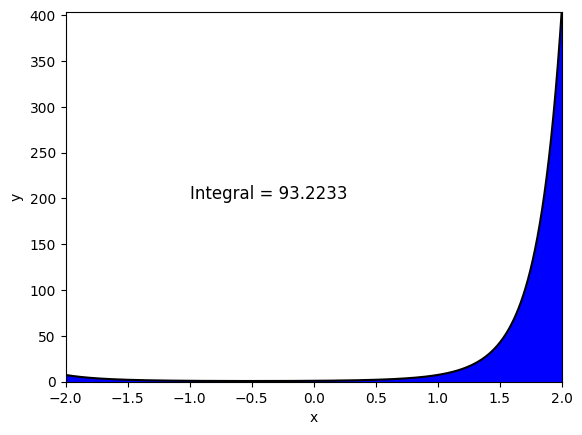

In [22]:
print('\n')
x = np.linspace(-2, 2, N)
y = np.exp(x**2 + x)

plt.plot(x, y, color='black')
plt.xlim(-2, 2), plt.ylim(0, np.exp(2**2 + 2))
plt.xlabel('x'), plt.ylabel('y')

plt.text(-1, 200, f'Integral = {integral:.4f}', fontsize=12, color='black')
plt.fill_between(x, y, color='blue')
plt.show()
